## Mid-term Project (Logistic Regression)

Git-hub: https://github.com/nimesh2091/Telecom-Customer-Churn-Analysis/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### With all the necessary packages and libraries imported, let's import the data and explore it.

In [2]:
#import data
telecom = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

#check the columns and look for missing values
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

#### why is TotalCharges an object and not a float?
#### Let's sort the values and see. If there are any character-values in the field, they will appear first.

In [3]:
telecom.sort_values(by='TotalCharges').head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


In [4]:
telecom[telecom['TotalCharges'] == ' ']['TotalCharges'].count()

11

#### There are null observations with ' ' filled in them. We drop these 11 observations

In [5]:
telecom=telecom[telecom['TotalCharges'] != ' ']

#convert the type for TotalCharges to float
telecom['TotalCharges']=telecom['TotalCharges'].astype('float')

#### Distribution of Numeric Features

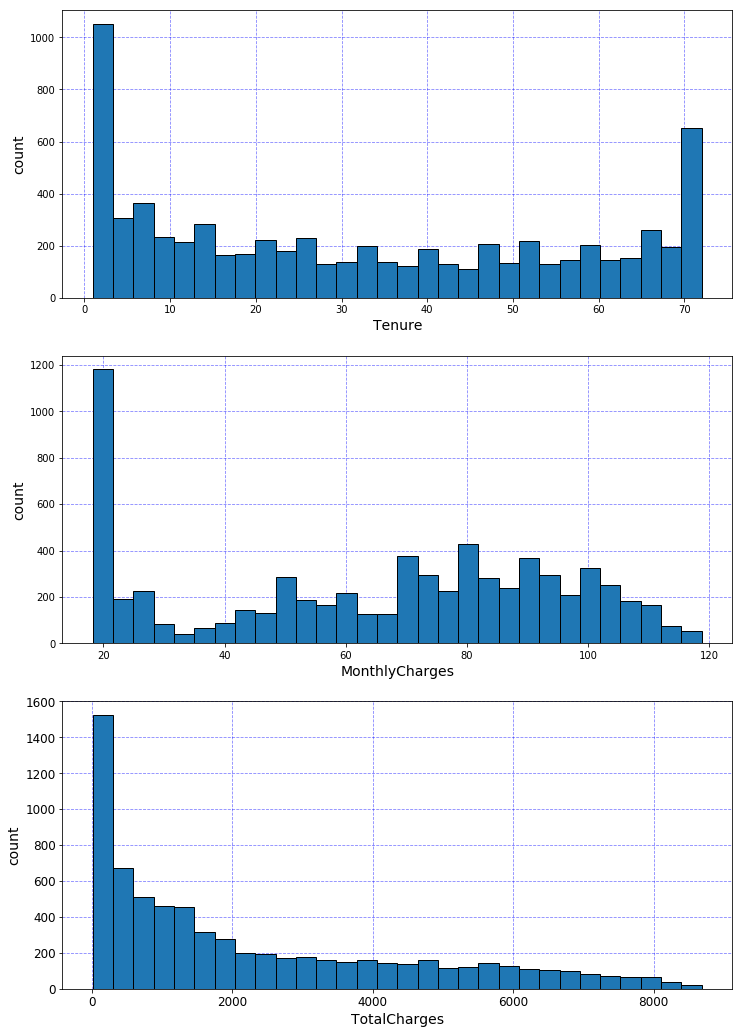

In [6]:
fig, axes = plt.subplots(3,1, figsize=(12,18))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

axes[0].hist(telecom['tenure'],bins=30,edgecolor='black',linewidth=1.0)
axes[0].set_xlabel('Tenure',fontsize=14)
axes[0].set_ylabel('count',fontsize=14)
axes[0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.8,visible=True)
axes[0].set_axisbelow(True)

axes[1].hist(telecom['MonthlyCharges'],bins=30,edgecolor='black',linewidth=1.0)
axes[1].set_xlabel('MonthlyCharges',fontsize=14)
axes[1].set_ylabel('count',fontsize=14)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.8,visible=True)
axes[1].set_axisbelow(True)

axes[2].hist(telecom['TotalCharges'],bins=30,edgecolor='black',linewidth=1.0)
axes[2].set_xlabel('TotalCharges',fontsize=14)
axes[2].set_ylabel('count',fontsize=14)
axes[2].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.8,visible=True)
axes[2].set_axisbelow(True)

#### Distribution of categorical features

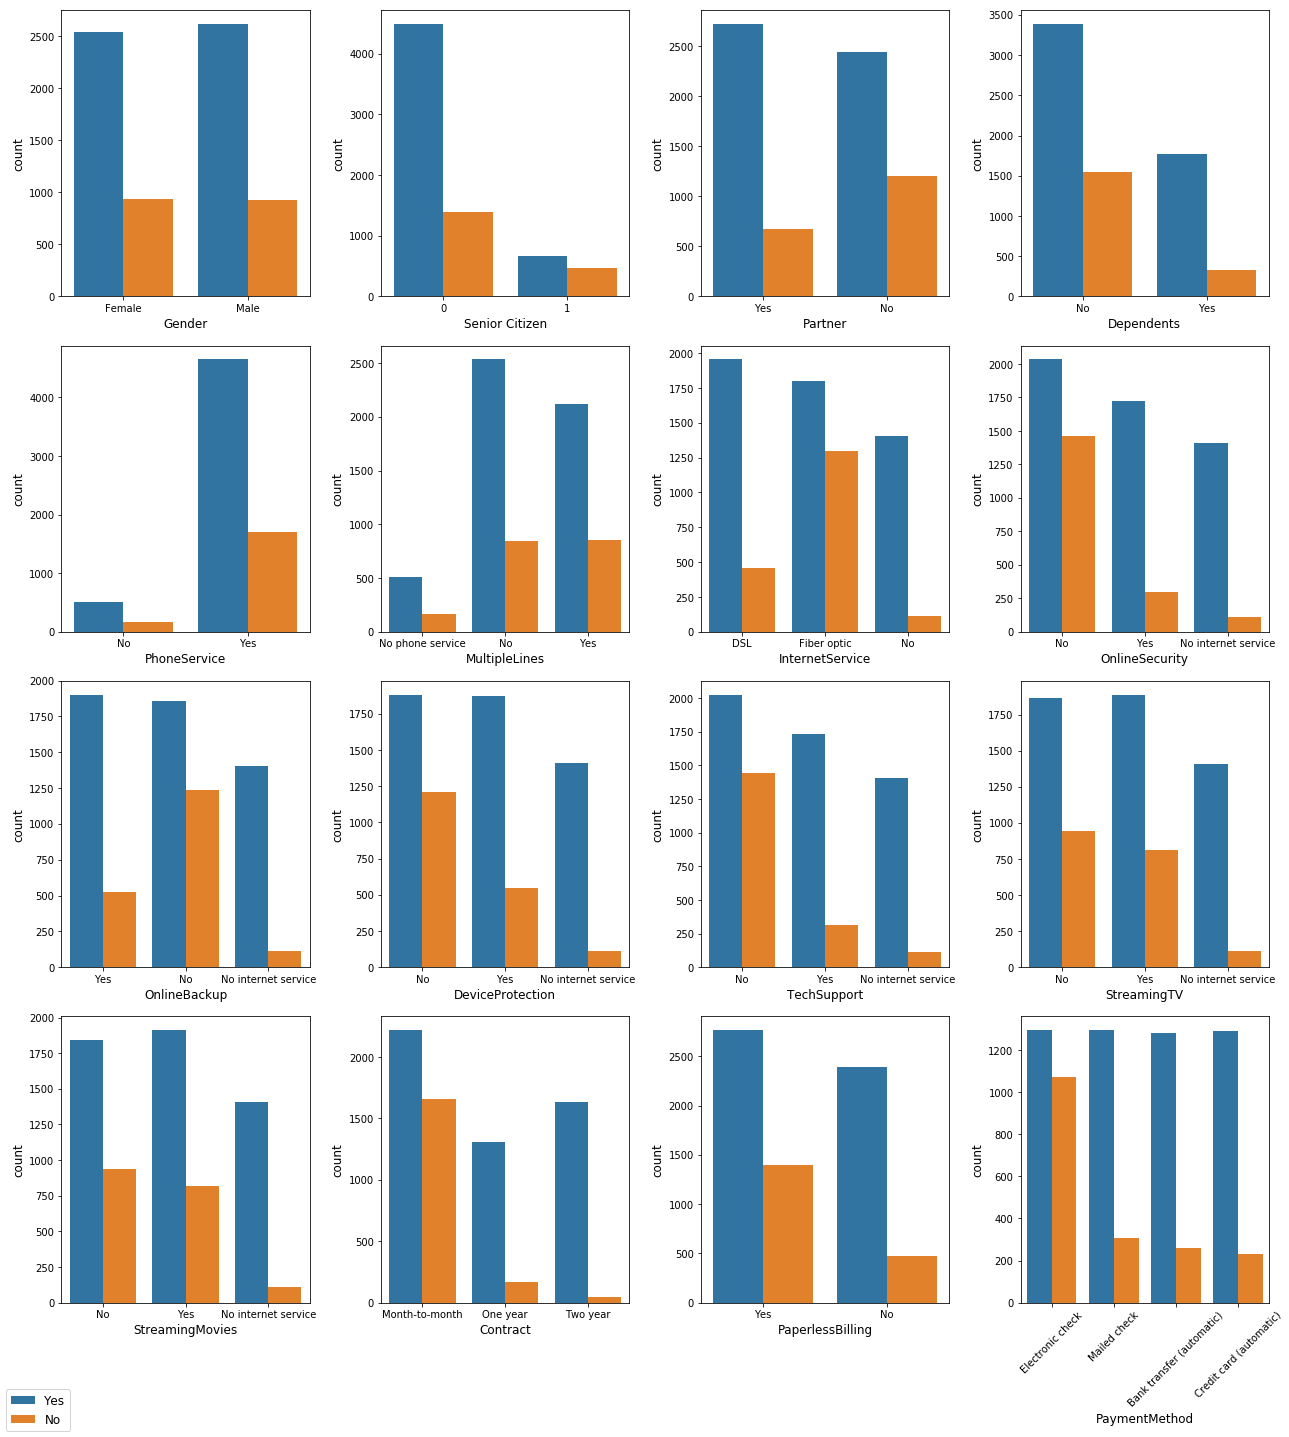

In [7]:
fig = plt.figure(figsize=(18,20))
ax1 = plt.subplot2grid((4,4), (0,0))
ax2 = plt.subplot2grid((4,4), (0,1))
ax3 = plt.subplot2grid((4,4), (0,2))
ax4 = plt.subplot2grid((4,4), (0,3))
ax5 = plt.subplot2grid((4,4), (1,0))
ax6 = plt.subplot2grid((4,4), (1,1))
ax7 = plt.subplot2grid((4,4), (1,2))
ax8 = plt.subplot2grid((4,4), (1,3))
ax9 = plt.subplot2grid((4,4), (2,0))
ax10 = plt.subplot2grid((4,4), (2,1))
ax11 = plt.subplot2grid((4,4), (2,2))
ax12 = plt.subplot2grid((4,4), (2,3))
ax13 = plt.subplot2grid((4,4), (3,0))
ax14 = plt.subplot2grid((4,4), (3,1))
ax15 = plt.subplot2grid((4,4), (3,2))
ax16 = plt.subplot2grid((4,4), (3,3))

sns.countplot(telecom['gender'],ax=ax1,hue=telecom['Churn'])
ax1.set_xlabel('Gender',fontsize=12)
ax1.set_ylabel('count',fontsize=12)
ax1.legend().set_visible(False)

sns.countplot(telecom['SeniorCitizen'],ax=ax2,hue=telecom['Churn'])
ax2.set_xlabel('Senior Citizen',fontsize=12)
ax2.set_ylabel('count',fontsize=12)
ax2.legend().set_visible(False)

sns.countplot(telecom['Partner'],ax=ax3,hue=telecom['Churn'])
ax3.set_xlabel('Partner',fontsize=12)
ax3.set_ylabel('count',fontsize=12)
ax3.legend().set_visible(False)

sns.countplot(telecom['Dependents'],ax=ax4,hue=telecom['Churn'])
ax4.set_xlabel('Dependents',fontsize=12)
ax4.set_ylabel('count',fontsize=12)
ax4.legend().set_visible(False)

sns.countplot(telecom['PhoneService'],ax=ax5,hue=telecom['Churn'])
ax5.set_xlabel('PhoneService',fontsize=12)
ax5.set_ylabel('count',fontsize=12)
ax5.legend().set_visible(False)

sns.countplot(telecom['MultipleLines'],ax=ax6,hue=telecom['Churn'])
ax6.set_xlabel('MultipleLines',fontsize=12)
ax6.set_ylabel('count',fontsize=12)
ax6.legend().set_visible(False)

sns.countplot(telecom['InternetService'],ax=ax7,hue=telecom['Churn'])
ax7.set_xlabel('InternetService',fontsize=12)
ax7.set_ylabel('count',fontsize=12)
ax7.legend().set_visible(False)

sns.countplot(telecom['OnlineSecurity'],ax=ax8,hue=telecom['Churn'])
ax8.set_xlabel('OnlineSecurity',fontsize=12)
ax8.set_ylabel('count',fontsize=12)
ax8.legend().set_visible(False)

sns.countplot(telecom['OnlineBackup'],ax=ax9,hue=telecom['Churn'])
ax9.set_xlabel('OnlineBackup',fontsize=12)
ax9.set_ylabel('count',fontsize=12)
ax9.legend().set_visible(False)

sns.countplot(telecom['DeviceProtection'],ax=ax10,hue=telecom['Churn'])
ax10.set_xlabel('DeviceProtection',fontsize=12)
ax10.set_ylabel('count',fontsize=12)
ax10.legend().set_visible(False)

sns.countplot(telecom['TechSupport'],ax=ax11,hue=telecom['Churn'])
ax11.set_xlabel('TechSupport',fontsize=12)
ax11.set_ylabel('count',fontsize=12)
ax11.legend().set_visible(False)

sns.countplot(telecom['StreamingTV'],ax=ax12,hue=telecom['Churn'])
ax12.set_xlabel('StreamingTV',fontsize=12)
ax12.set_ylabel('count',fontsize=12)
ax12.legend().set_visible(False)

sns.countplot(telecom['StreamingMovies'],ax=ax13,hue=telecom['Churn'])
ax13.set_xlabel('StreamingMovies',fontsize=12)
ax13.set_ylabel('count',fontsize=12)
ax13.legend().set_visible(False)

sns.countplot(telecom['Contract'],ax=ax14,hue=telecom['Churn'])
ax14.set_xlabel('Contract',fontsize=12)
ax14.set_ylabel('count',fontsize=12)
ax14.legend().set_visible(False)

sns.countplot(telecom['PaperlessBilling'],ax=ax15,hue=telecom['Churn'])
ax15.set_xlabel('PaperlessBilling',fontsize=12)
ax15.set_ylabel('count',fontsize=12)
ax15.legend().set_visible(False)

sns.countplot(telecom['PaymentMethod'],ax=ax16,hue=telecom['Churn'])
ax16.set_xlabel('PaymentMethod',fontsize=12)
ax16.set_ylabel('count',fontsize=12)
ax16.tick_params(axis='x',labelrotation=45,labelsize=10)
ax16.legend().set_visible(False)

fig.legend(labels=('Yes','No'),loc='lower left',fontsize=12)
plt.tight_layout()

Let's check the correlation between features

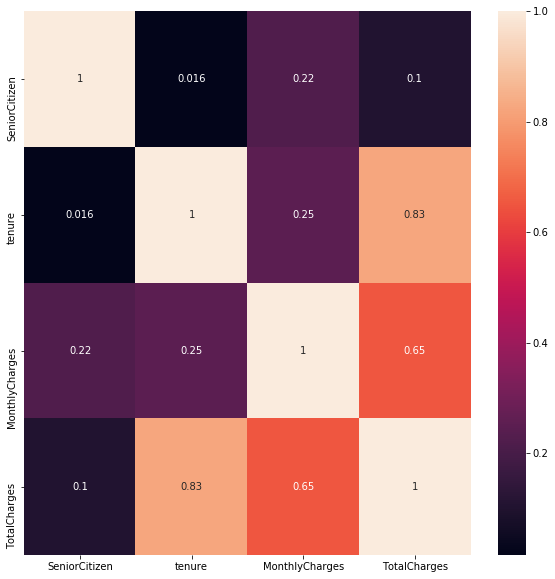

In [8]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(telecom.corr(),annot=True)

TotalCharges has high correlation with tenure and MonthlyCharges. It looks like TotalCharges is some combination of MonthlyCharges and tenure. It's better to leave this feature out of the model.

#### Create dummy variables for the categorical variables in the dataframe

In [9]:
dummy = pd.get_dummies(telecom.drop('customerID',axis=1),drop_first=True)
dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


With the data ready, we can build a model to classify customers if they churn.

In [10]:
X = dummy.drop(['Churn_Yes','TotalCharges'],axis=1)
y = dummy['Churn_Yes']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.333, random_state=10)

In [12]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
predictions_train = logmodel.predict(X_train)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [15]:
print('Confusion-matrix: ')
print(confusion_matrix(y_train,predictions_train))
print('Accuracy-Score (Train-data): {:.4f}'.format(accuracy_score(y_train, predictions_train)))

Confusion-matrix: 
[[3070  361]
 [ 567  692]]
Accuracy-Score (Train-data): 0.8021


In [16]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print('Confusion-matrix: ')
print(confusion_matrix(y_test,predictions))
print('Accuracy-Score (Test-data): {:.4f}'.format(accuracy_score(y_test,predictions)))

             precision    recall  f1-score   support

          0       0.85      0.90      0.87      1732
          1       0.66      0.56      0.61       610

avg / total       0.80      0.81      0.81      2342

Confusion-matrix: 
[[1553  179]
 [ 266  344]]
Accuracy-Score (Test-data): 0.8100
